In [1]:
import tensorflow.compat.v1 as tf # 하위 버전과의 호환성을 위해 텐서플로 1.0버전으로 작성
tf.disable_v2_behavior()

# 파라미터 설정(실험을 통해 구해야 하는 값)
learning_rate=0.01 # 학습률
epochs=1000 # 학습 횟수
step_display=50 # 진행 상태를 출력할 단계

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
# 회귀분석 : 전기 생산량과 소비량
x=[3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20] # 월별 전기 생산 금액(억원)
y=[2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53] # 월별 전기 사용량(백만kWh)

In [11]:
# 가중치(weight)와 절편(bias)
weight=tf.Variable(tf.random_uniform([1],-1.0,1.0), name="weight")
bias=tf.Variable(tf.random_uniform([1],-1.0,1.0), name="bias")
# tf.random_uniform([1] 변수의 형태, -1.0 최솟값, 1.0 최댓값) 무작위 수 초기화
# -1.0 ~ 1.0 사이의 값 생성
# name : 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙임

In [12]:
# placeholder : 학습용 데이터를 담는 그릇. 그래프에서 x(입력값)를 저장하는 저장소
X=tf.placeholder(dtype=tf.float32, name="X")
Y=tf.placeholder(dtype=tf.float32, name="Y")
# dtype : 자료형, shape : 행렬의 차원, name : placeholder의 이름
# 그래프에 구축할 때는 메모리에 저장하지 않고 그래프를 실행할 때 피드하면서 메모리에 저장됨

In [13]:
y_pred=tf.add(tf.multiply(weight, X), bias) # y = W*x + b , W와 X가 행렬이 아니므로 matmul이 아닌 multiply
cost=tf.reduce_mean(tf.square(y_pred - Y)) # 손실함수(비용함수) : 예측값과 실제값의 거리를 계산하는 함수
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost) # 비용을 최소화시킴

In [14]:
init=tf.global_variables_initializer() # 변수 초기화
# 세션 생성 및 시작
sess=tf.Session()
sess.run(init)

In [15]:
for epoch in range(epochs):
    _, cost_val=sess.run([optimizer, cost], feed_dict={X:x, Y:y})
    if (epoch+1)%step_display == 0:
        print(f"Epoch : {epoch+1}, cost : {cost_val}, weight : {sess.run(weight)}, bias : {sess.run(bias)}")

Epoch : 50, cost : 11.873051643371582, weight : [-0.0511193], bias : [-0.33968538]
Epoch : 100, cost : 3.0437068939208984, weight : [0.292151], bias : [0.00420042]
Epoch : 150, cost : 0.5565505027770996, weight : [0.4946773], bias : [0.20813583]
Epoch : 200, cost : 0.0929059386253357, weight : [0.5898791], bias : [0.30555356]
Epoch : 250, cost : 0.037676818668842316, weight : [0.62473464], bias : [0.34326047]
Epoch : 300, cost : 0.03351732715964317, weight : [0.63428646], bias : [0.35612413]
Epoch : 350, cost : 0.03325197473168373, weight : [0.63580275], bias : [0.36131132]
Epoch : 400, cost : 0.0331556461751461, weight : [0.6353667], bias : [0.3648588]
Epoch : 450, cost : 0.03305748477578163, weight : [0.6345459], bias : [0.36831215]
Epoch : 500, cost : 0.032953664660453796, weight : [0.633632], bias : [0.37194905]
Epoch : 550, cost : 0.03284452483057976, weight : [0.63266224], bias : [0.3757962]
Epoch : 600, cost : 0.032730381935834885, weight : [0.63164085], bias : [0.37984836]
Epoc

In [16]:
training_cost=sess.run(cost, feed_dict={X:x, Y:y})
print("최종 cost :", cost_val)
print("정확도 :", 100-cost_val)
print("최종 가중치 :", sess.run(weight))
print("최종 절편 :", sess.run(bias))

최종 cost : 0.031672455
정확도 : 99.96832754462957
최종 가중치 : [0.6217851]
최종 절편 : [0.41895136]


In [9]:
print("X : 5, Y :", sess.run(y_pred, feed_dict={X: 5}))
print("X : 2.5, Y :", sess.run(y_pred, feed_dict={X: 2.5}))

X : 5, Y : [3.1952467]
X : 2.5, Y : [2.443882]


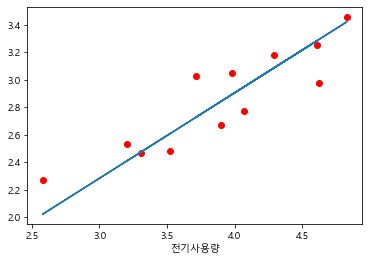

In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.plot(x,y,'ro') # red, o
plt.plot(x, sess.run(weight)*x+sess.run(bias))
plt.xlabel('전기생산량')
plt.xlabel('전기사용량')
plt.show()

In [18]:
sess.close() # 세션 종료